# Importing Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

# Reading the File

In [2]:
df = pd.read_csv(r"C:\Users\Nikoo\RegressionP.csv")

# Preprocessing Data

In [3]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
df.dropna(subset = ['Address'], inplace=True)

In [5]:
len(df. index)

3456

In [6]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [7]:
df['Area'] = df['Area'].str.replace(r'\D', '').astype('int64')

C:\Users\Nikoo\AppData\Local\Temp\ipykernel_19284\4100099800.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Area'] = df['Area'].str.replace(r'\D', '').astype('int64')


In [8]:
df.max()

Area            16160000000
Room                      5
Parking                True
Warehouse              True
Elevator               True
Address           Zibadasht
Price         92400000000.0
Price(USD)        3080000.0
dtype: object

<AxesSubplot:xlabel='Area'>

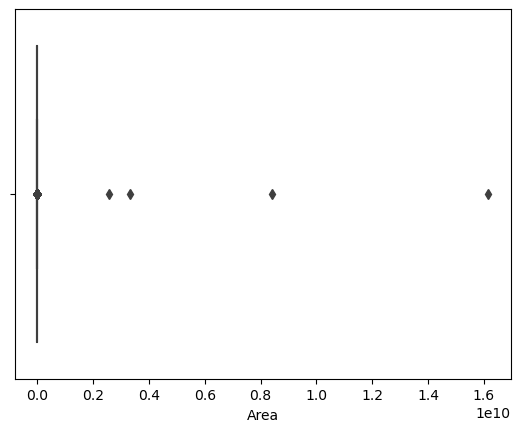

In [9]:
sns.boxplot(x=df['Area'])

In [10]:
df.max()

Area            16160000000
Room                      5
Parking                True
Warehouse              True
Elevator               True
Address           Zibadasht
Price         92400000000.0
Price(USD)        3080000.0
dtype: object

In [11]:
df.drop(df[df['Area']>3500].index, inplace=True)

<AxesSubplot:xlabel='Area'>

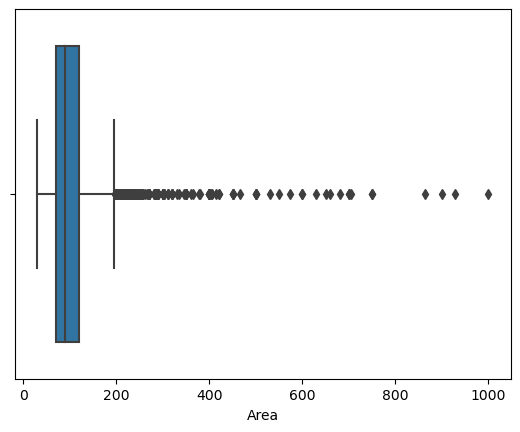

In [12]:
sns.boxplot(x=df['Area'])

## Plotting Data

Text(0, 0.5, 'Price')

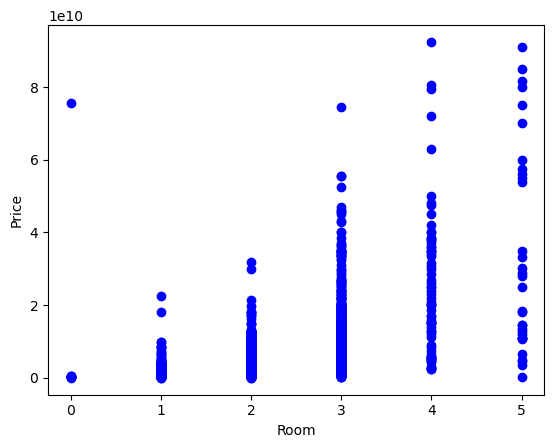

In [13]:
plt.scatter(df.Room, df.Price,  color='blue')
plt.xlabel("Room")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

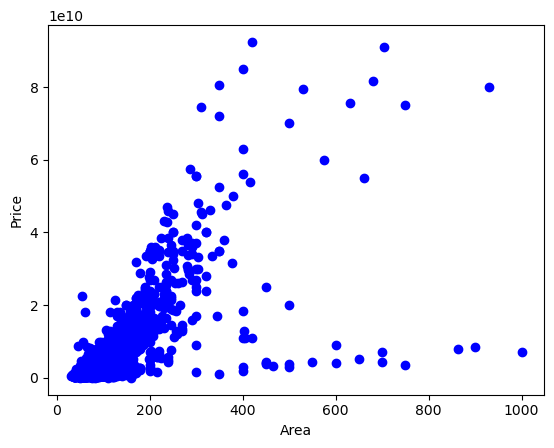

In [14]:
plt.scatter(df.Area, df.Price,  color='blue')
plt.xlabel("Area")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

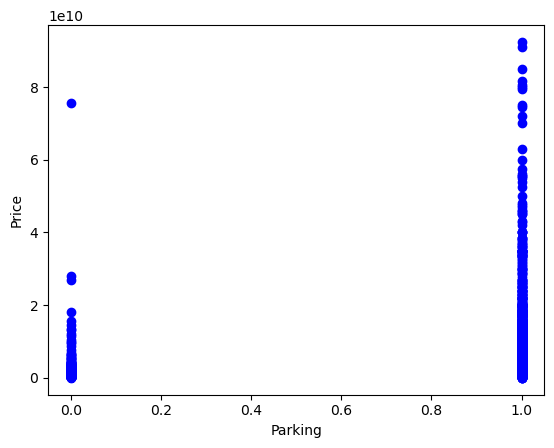

In [15]:
plt.scatter(df.Parking, df.Price,  color='blue')
plt.xlabel("Parking")
plt.ylabel("Price")

In [16]:
from sklearn import preprocessing

In [17]:
df['Parking'] = df['Parking'].astype(int) 
df['Warehouse'] = df['Warehouse'].astype(int)
df['Elevator'] = df['Elevator'].astype(int)

In [18]:
df['Address'].value_counts()

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                140
Shahran                   130
                         ... 
Chardangeh                  1
Mehrabad                    1
Pakdasht KhatunAbad         1
Kazemabad                   1
Yakhchiabad                 1
Name: Address, Length: 192, dtype: int64

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Address"] = ord_enc.fit_transform(df[["Address"]])

In [20]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156.0,1.850000e+09,61666.67
1,60,1,1,1,1,156.0,1.850000e+09,61666.67
2,79,2,1,1,1,117.0,5.500000e+08,18333.33
3,95,2,1,1,1,152.0,9.025000e+08,30083.33
4,123,2,1,1,1,150.0,7.000000e+09,233333.33


# Define x(features) and y(lables)

In [21]:
x = df.loc[:,~df.columns.isin(['Price','Price(USD)'])]
y = df[['Price','Price(USD)']]

# Normalize Dataset

In [22]:
scale = preprocessing.StandardScaler().fit(x)
x = scale.fit_transform(x)

# Train_Test split

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

# Multiple Regression

In [24]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

# Evaluation

In [25]:
from sklearn.metrics import r2_score
y_pred = regr.predict(x_test)
r2_score(y_test,y_pred)

0.5500307851238595

# Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
x_trainpoly = poly.fit_transform(x_train)
x_testpoly = poly.fit_transform(x_test)
regr.fit(x_trainpoly, y_train)

LinearRegression()

# Evaluation

In [27]:
from sklearn.metrics import r2_score
y_pred = regr.predict(x_testpoly)
r2_score(y_test,y_pred)

0.7119378884500689

# Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 10, random_state = 0)
regr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

# Evaluation

In [29]:
from sklearn.metrics import r2_score
y_pred = regr.predict(x_test)
r2_score(y_test,y_pred)

0.7874457911866457

# Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state = 0)
regr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

# Evaluation

In [31]:
from sklearn.metrics import r2_score
y_pred = regr.predict(x_test)
r2_score(y_test,y_pred)

0.6184332143272977